# Saurav S. Tank

## Task 1 : Prediction Using Supervised ML

Predict the percentage of a student on the basis of no. of study hours.  
This is a simple regression task as it involves just two variables.

### 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading Data

In [2]:
link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data is imported succesfully")
data.head()

Data is imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 3. Data Attributes

In [3]:
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4. Checking Missing Values

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

 This proves that there is no missing data. Hence, data cleaning is not required.

### 5. Data Vizualisation

 Lets start plotting our data on 2-D graph to get the insights or relation between the data

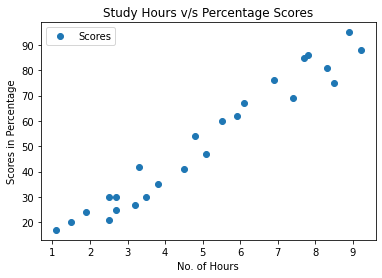

In [7]:
# Plotting the Distribution of Hours v/s Scores
data.plot(x="Hours",y="Scores",style="o")
plt.title("Study Hours v/s Percentage Scores")
plt.xlabel("No. of Hours")                         # x-axis
plt.ylabel("Scores in Percentage")                 # y-axis
plt.show()

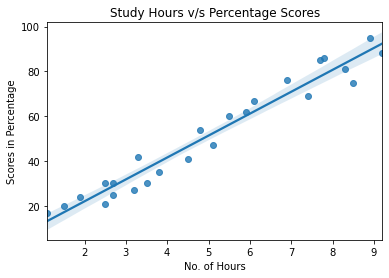

In [8]:
# Plotting the Seaborn Regressor plot to determine the realtion between feature and target
sns.regplot(x=data["Hours"],y=data["Scores"],data=data)
plt.title("Study Hours v/s Percentage Scores")
plt.xlabel("No. of Hours")                         # x-axis
plt.ylabel("Scores in Percentage")                 # y-axis
plt.show()

It can be clearly seen that there is a positive correlation between the study hours and percentage scores

### 6. Preparing the Data 

Lets divide the data into inputs i.e. attributes and outputs i.e. labels

In [9]:
x = data.iloc[:,:-1].values  # Attribute
y = data.iloc[:,1].values    # Labels

Next step after getting our attributes and labels is to split the data into training and test sets using the scikit-learn 
model i.e. train_test_split

In [10]:
# Import scikit-learn built-in function train_test_split and splitting the data accordingly
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

As we can see that both the the training and test datasets are ready for training our model. 

### 7. Training the model

Using Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
print("Coefficient :", model.coef_)
print("Intercept :", model.intercept_)

Coefficient : [9.68207815]
Intercept : 2.826892353899737


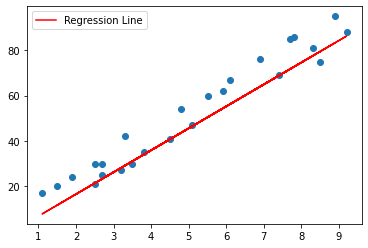

In [13]:
# Plotting the regression line
line = model.coef_*x - model.intercept_

# Plotting from th eperspective of test data
plt.scatter(x,y)
plt.plot(x, line, color="red", label="Regression Line")
plt.legend()
plt.show()

### 8. Making Predictions

As the model is now trained, wan make predictions accordingly

In [14]:
y_preds = model.predict(X_test)

In [15]:
# Comparing the actual vs predicted dataset
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_preds})
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [16]:
# Training and Testing Scores
print("Training Score :", model.score(X_train, y_train))
print("Testing Score :", model.score(X_test, y_test))

Training Score : 0.9491209376364416
Testing Score : 0.9678055545167994


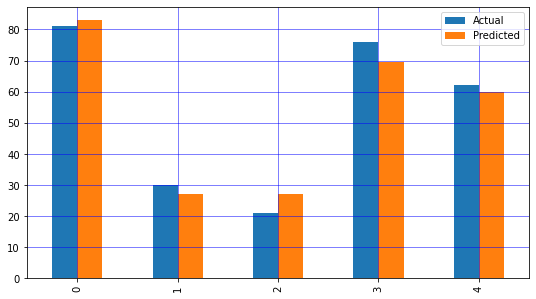

In [17]:
# plotting the grid to illustrate the actual and predicted value
df.plot(kind="bar", figsize=(9,5))
plt.grid(which="major",linewidth="0.5", color="blue")
plt.grid(which="minor",linewidth="0.5", color="red")

## Task 2 : What if the Student studies for 9.25 hours/day? 

In [18]:
# Testing with given new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
new_pred = model.predict(test)
print(f"No. of hours = {hours}")
print(f"Predicted Score = {new_pred[0]}")

No. of hours = 9.25
Predicted Score = 92.38611528261494


## 9. This is the final step evaluating the model

This is the final step involved in order to find how accurate the model is. It basically used to evaluate the performance of different algorithms on a particular dataset.

In [19]:
# Import metrics and parameters used for evaluation
from sklearn import metrics
print("Mean Absolute Error :", metrics.mean_absolute_error(y_test, y_preds))
print("Mean Squared Error :", metrics.mean_squared_error(y_test, y_preds))
print("Root Mean Squared Error :", np.sqrt(metrics.mean_squared_error(y_test, y_preds)))
print("R-2 :", metrics.r2_score(y_test,y_preds))

Mean Absolute Error : 3.9207511902099244
Mean Squared Error : 18.943211722315272
Root Mean Squared Error : 4.352380006653288
R-2 : 0.9678055545167994


* Excellent results are displayed as R-2 score tends to be around 96.7% which actually helps in evaluating fit of the model
* Even the accuracy of the model can be counted as 96.8%.
* At last, it indicates that the model is fit for this particular prediction task.

## Thank You